In [7]:
import tensorflow as tf
import numpy as np

In [8]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40., 14., 32., 46., 59., 72., 100.], dtype=float)
celsius

array([-40., -10.,   0.,   8.,  15.,  22.,  38.])

In [9]:
#vamos a usar keras para simplificar codigo
#puedo especificar las capas de entrada y de salida o solo la de salida
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#units es la cant de neuronas de salida e input shape la cant de neuronas de entrada

#modelo secuencial
modelo = tf.keras.Sequential([capa])

In [10]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #0.1 es la tasa de aprendizaje
    loss='mean_squared_error' #funcion de perdida
)

In [11]:
#comienza entrenamiento
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
#modelo entrenado

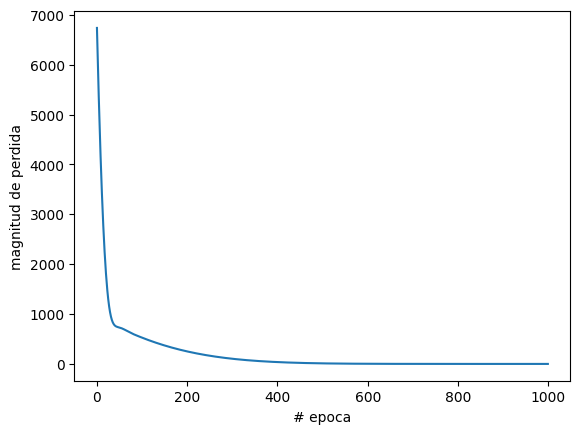

In [13]:
import matplotlib.pyplot as plt
plt.xlabel("# epoca")
plt.ylabel("magnitud de perdida")
plt.plot(historial.history["loss"])

## Prueba de prediccion

In [22]:
resultado = modelo.predict(np.array([[100.0]]))
resultado

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[211.74101]], dtype=float32)

In [25]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7983602]], dtype=float32), array([31.90499], dtype=float32)]


# Analisis de resultado
Los pesos obtenidos fueron 1.798... y 31.9
Entonces lo que hace es aplicar la formula, que para los valores de entrada lo tiene que multiplicar por 1.79 y sumar 31.9. SIN DECIRLE LA FORMULA LLEGA MUY CERCA porque la formula real es por 1.8 + 32